# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Devin\OneDrive\Documents\Launchcode\python\data-analysis-projects\eda-checkpoint\archive (2)\Impact_of_Remote_Work_on_Mental_Health.csv")

In [2]:
df.head(10)
# printing the first 10 rows to get an idea of the layout the data set contains

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [7]:
df.info()
# printing a list of the rows and there data types, while this data set does not contain any nulls it does contain NANs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [4]:
df.shape
# checking the overall rows in the dataset as well as the overall columns.

(5000, 20)

In [6]:
df.isna().sum()
# getting a sum of all of the columns that have NANs in them.

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [37]:
df['Age'].describe()
# checking the distribution of the ages of the respondents 

count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

In [16]:
df.groupby('Work_Location')['Employee_ID'].count()
#Checking the distribution of the sample size for whether people work at home, hybrid or remote.

Work_Location
Hybrid    1649
Onsite    1637
Remote    1714
Name: Employee_ID, dtype: int64

In [17]:
df.groupby('Sleep_Quality')['Employee_ID'].count()
# Checking the distribution for sleep quality among the data set

Sleep_Quality
Average    1628
Good       1687
Poor       1685
Name: Employee_ID, dtype: int64

In [18]:
df.groupby('Physical_Activity')['Employee_ID'].count()
# Checking the distribution for Physical activity, one thing to note is how the NANs are impacting this answer

Physical_Activity
Daily     1616
Weekly    1755
Name: Employee_ID, dtype: int64

In [21]:
df['Physical_Activity'].unique()
# checking the unique IDs that are in the physical activity column, making sure that the other value is just NAN.

array(['Weekly', nan, 'Daily'], dtype=object)

In [23]:
df['Mental_Health_Condition'].unique()
# Doing the same thing for the mental health condition column. 

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [24]:
df.groupby('Satisfaction_with_Remote_Work')['Employee_ID'].count()
# trying to get an idea of the spread of the data set within remote work satisfaction, so far the data has been very evenly distributed among the answers.

Satisfaction_with_Remote_Work
Neutral        1648
Satisfied      1675
Unsatisfied    1677
Name: Employee_ID, dtype: int64

In [33]:
df.groupby('Social_Isolation_Rating')[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']].mean()
# using groupby to check for any possible correlation between social isolation and workload or amount of virtual meetings, on the surface I do not see any correlation between these.

,Hours_Worked_Per_Week,Number_of_Virtual_Meetings
Social_Isolation_Rating,,
1,39.532004,7.588667
2,39.541276,7.465291
3,40.024194,7.579637
4,39.759884,7.705882
5,39.194328,7.452731


In [28]:
df['Years_of_Experience'].describe()
# looking at the distribution of experiance among the responses.

count    5000.000000
mean       17.810200
std        10.020412
min         1.000000
25%         9.000000
50%        18.000000
75%        26.000000
max        35.000000
Name: Years_of_Experience, dtype: float64

In [30]:
df['Job_Role'].unique()
# checking the various roles that this data set contains

array(['HR', 'Data Scientist', 'Software Engineer', 'Sales', 'Marketing',
       'Designer', 'Project Manager'], dtype=object)

In [42]:
df.groupby('Work_Location')[['Social_Isolation_Rating','Work_Life_Balance_Rating','Age','Hours_Worked_Per_Week','Number_of_Virtual_Meetings', 'Years_of_Experience', 'Company_Support_for_Remote_Work']].mean().round(2)
# in alot of the previous lines of code i've been checking for possible trends not relating to job position, seeing if certian life style choices have impacted the data set. 
# in this line and the next few I am trying to see how the change in job location directly impacts the data.

,Social_Isolation_Rating,Work_Life_Balance_Rating,Age,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Years_of_Experience,Company_Support_for_Remote_Work
Work_Location,,,,,,,
Hybrid,3.01,3.02,41.05,39.59,7.28,18.01,2.97
Onsite,3.01,2.95,41.10,39.82,7.76,17.72,3.01
Remote,2.96,2.98,40.85,39.45,7.64,17.70,3.04


In [48]:
df.groupby(['Work_Location', 'Stress_Level']).size().reset_index(name='Count')
# Checking the spread of stress levels based on work location. 


,Work_Location,Stress_Level,Count
0,Hybrid,High,561
1,Hybrid,Low,543
2,Hybrid,Medium,545
3,Onsite,High,535
4,Onsite,Low,555
5,Onsite,Medium,547
6,Remote,High,590
7,Remote,Low,547
8,Remote,Medium,577


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
Work_Location,,,,,,,,,,,,,,,,,,,
Hybrid,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1249,1649,1649,1649,1649,1649,1113,1649,1649
Onsite,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,1261,1637,1637,1637,1637,1637,1087,1637,1637
Remote,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1294,1714,1714,1714,1714,1714,1171,1714,1714


In [52]:
df.groupby(['Work_Location', 'Productivity_Change']).size().reset_index(name='Count')
# Checking work location vs productivity change

,Work_Location,Productivity_Change,Count
0,Hybrid,Decrease,591
1,Hybrid,Increase,514
2,Hybrid,No Change,544
3,Onsite,Decrease,558
4,Onsite,Increase,514
5,Onsite,No Change,565
6,Remote,Decrease,588
7,Remote,Increase,558
8,Remote,No Change,568


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

C:\Users\Devin\AppData\Local\Temp\ipykernel_7740\4070823452.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_isolation, x='Social_Isolation_Rating', y='Work_Location', palette="Blues_d", width=.5)


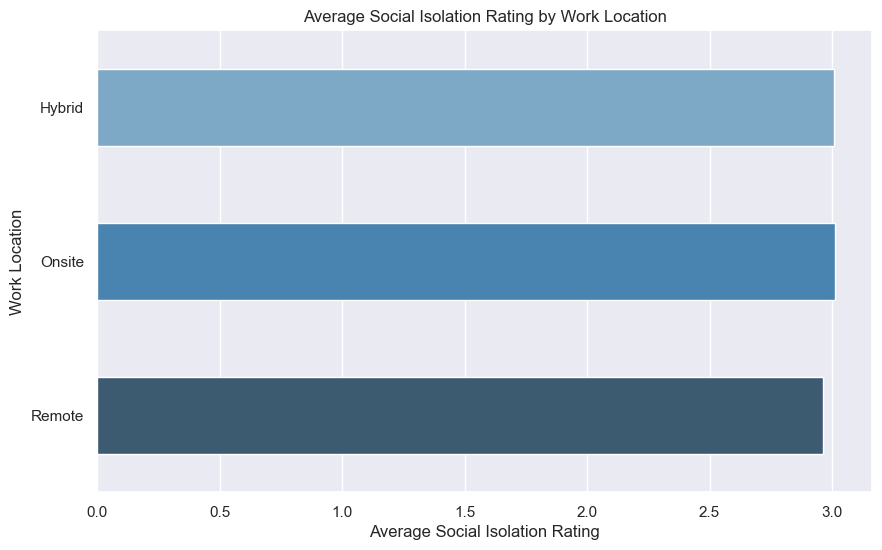

In [57]:

avg_isolation = df.groupby('Work_Location')['Social_Isolation_Rating'].mean().reset_index()
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,6))

sns.barplot(data=avg_isolation, x='Social_Isolation_Rating', y='Work_Location', palette="Blues_d", width=.5)
plt.title('Average Social Isolation Rating by Work Location')
plt.xlabel('Average Social Isolation Rating')
plt.ylabel('Work Location')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

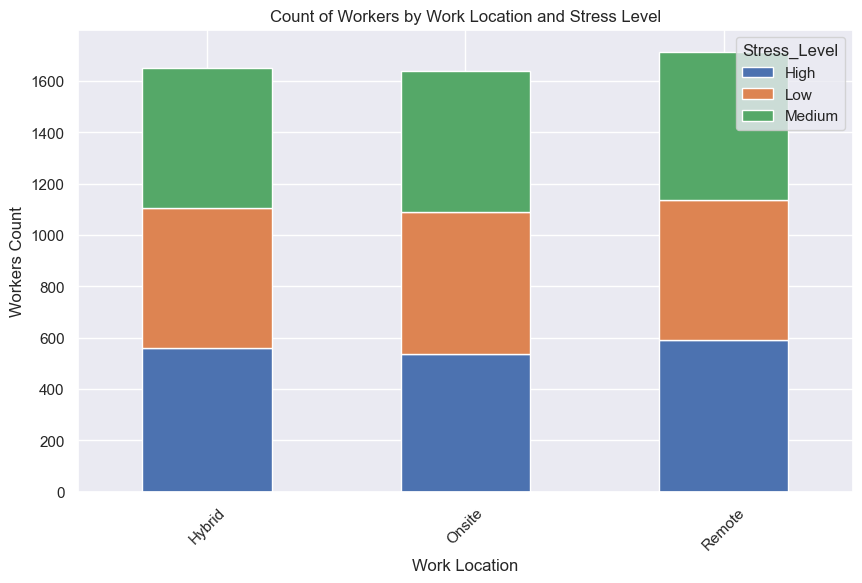

In [58]:

stress_count = df.groupby(['Work_Location', 'Stress_Level']).size().unstack(fill_value=0)
stress_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Workers by Work Location and Stress Level')
plt.xlabel('Work Location')
plt.ylabel('Workers Count')
plt.xticks(rotation=45)
plt.show

Text(0, 0.5, 'Social Isolation Rating')

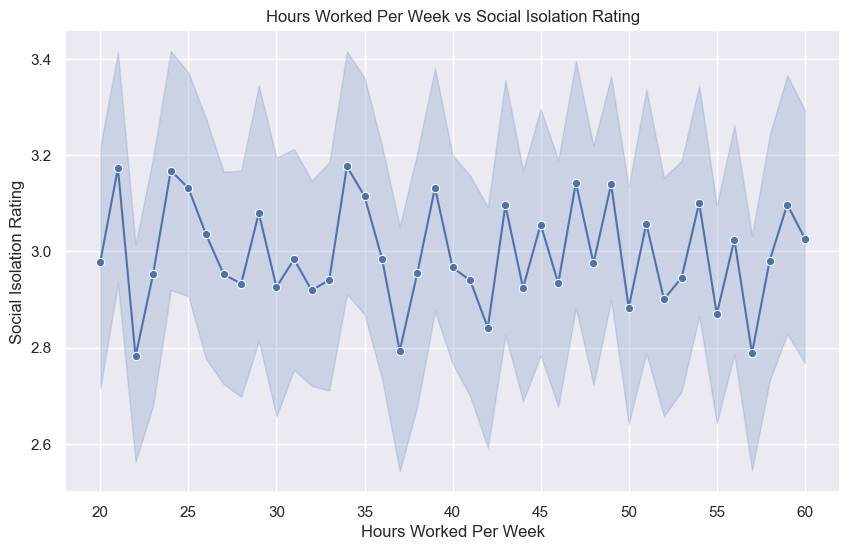

In [62]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Hours_Worked_Per_Week", y='Social_Isolation_Rating', marker='o')
plt.title('Hours Worked Per Week vs Social Isolation Rating')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Social Isolation Rating')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. A few things I found suprising was that one the data set was very balanced, I was expecting a slight skew to either to remote or Onsight on certain columns such as "Work Life Balance", "Social Isolation Rating", and "Number of Virtual Meetings"
2. I think the data will require alot of filtering to uncover some of the trends within this data set, working at home and onsight produce dramatically different lives and I expect there to be a difference in some of these indicators.
3. The biggest decision I have for cleaning is that I will need to decide to do with the physical activities and Mental Health Conditions columns with its NAN values.